# **Projeto Análise Exploratória (EDA) de Dados com SQL**

O objetivo deste projeto é realizar uma Análise Exploratória de Dados (EDA) utilizando as ferramentas AWS Athena e AWS S3, complementada pela visualização de dados através do Python, para aplicar e aprimorar as competências desenvolvidas ao longo do curso de Analista de Dados.

### **Ferramentas utilizadas para Análise de Dados**

1.  O Amazon Simple Storage Service (S3) é um serviço de armazenamento de objetos que oferece escalabilidade, disponibilidade de dados organizados em buckets e objetos, para armazenamento de dados;
2.  O Amazon Athena - É um serviço de consulta SQL interativo que permite analisar dados diretamente no Amazon S3 sem a necessidade de um SGBD tradicional;
3.  O Google Colab é um serviço gratuito baseado na nuvem que suporta a execução de notebooks Jupyter, permitindo aos usuários escrever e executar código Python.





### **Dataset Utilizado no Projeto**

O Dataset utilizado se trata de uma amostra do dataset original disponibilizado no GitHub do Professor André Perez no seguinte link: http://github.com/andre-marcos-perez/ebac-course-utils, para praticar as competências desenvolvidas, desta forma podem haver divergência nas análises.

Os dados disponibilizados correspondem às informações dos clientes de um banco, com o propósito de aprofundar o entendimento sobre suas necessidades e preferências. Isso visa identificar oportunidades para enriquecer a experiência do cliente e desenvolver novos produtos e serviços, por meio de estratégias de marketing direcionadas.


## **1. Extração e Tratamento de Dados**

As seguintes informações dos clientes foram fornecidas e armezanadas no Bucket do S3 e tabela credito criada no Athena:

•	idade = idade do cliente

•	sexo = sexo do cliente (F ou M)

•	dependentes = número de dependentes do cliente

•	escolaridade = nível de escolaridade do clientes

•	salario_anual = faixa salarial do cliente

•	tipo_cartao = tipo de cartao do cliente

•	qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

•	iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

•	meses_inativo_12m = quantidade de meses que o cliente ficou inativo

•	limite_credito = limite de credito do cliente

•	valor_transacoes_12m = valor das transações dos ultimos 12 meses

•	qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

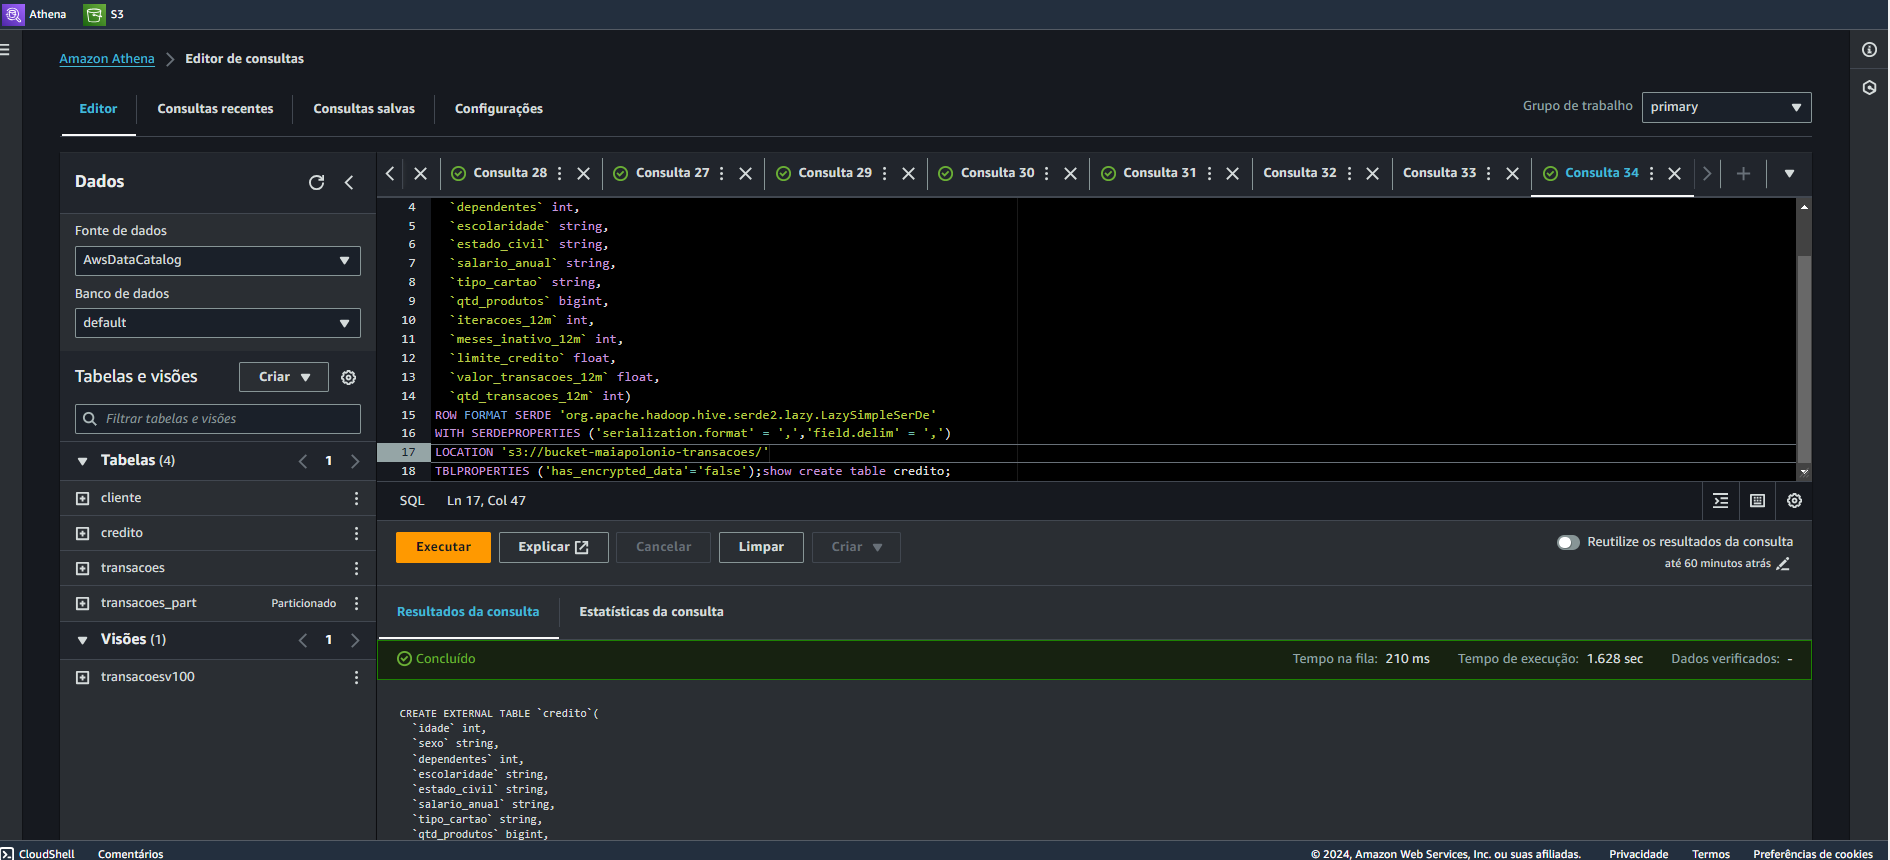

## **2. Exploração De Dados**

Foram utilizados algums comandos em SQL para explorar as informações.

**Verificando as informações da tabela**

SELECT * FROM "default"."credito" limit 10;

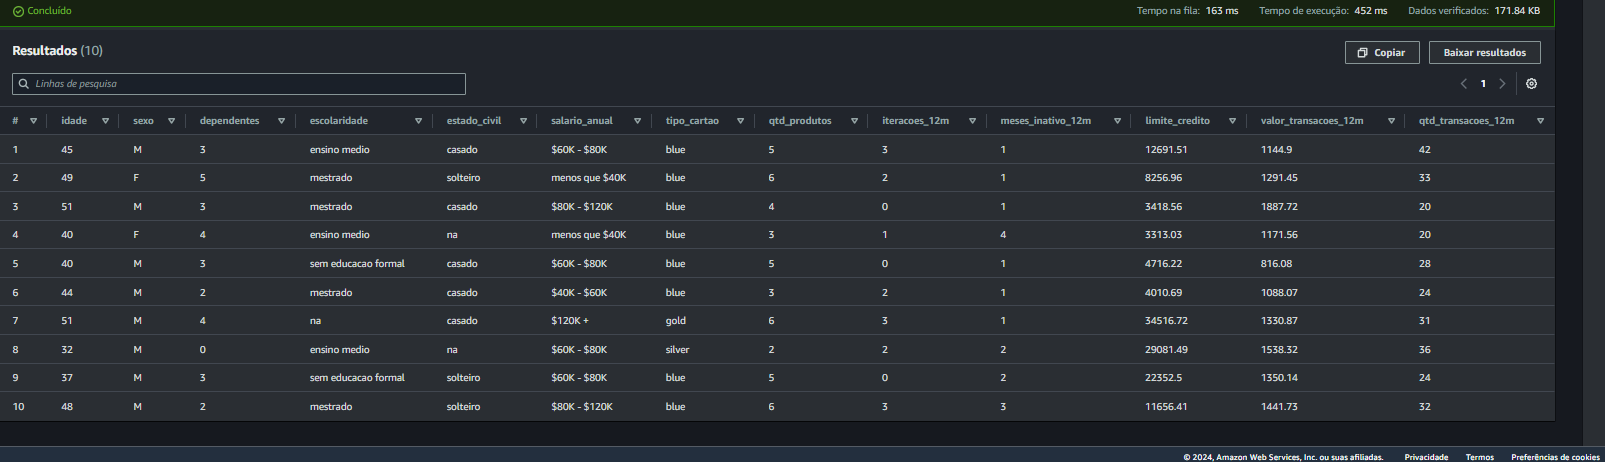

**Verificando a quantidade de informações na tabela**

select count(*) from credito

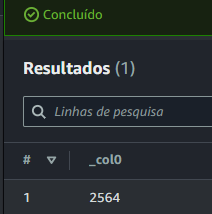

**Verificando os tipos de dados da tabela**

describe credito

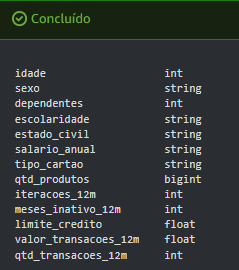

# **3. Visualização de Dados para Análises**

**Quantidade de Clientes Por Faixa Salarial**

select count(*) as quantidade_faixa, salario_anual
from credito

where salario_anual != 'na'

group by salario_anual

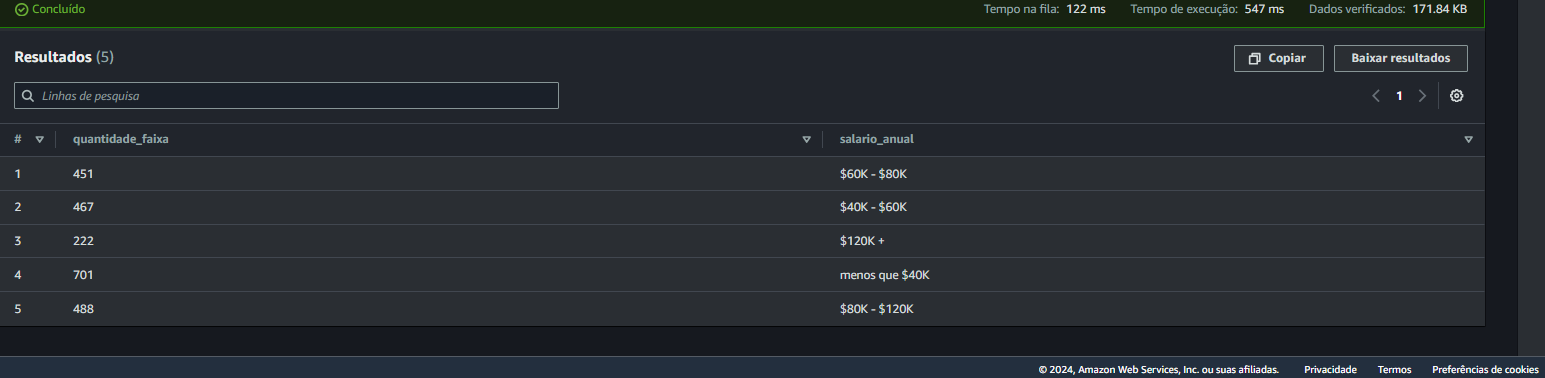

In [4]:
# Importanto as bibliotecas no Python para Visualização
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

In [5]:
#Importando arquivo Credito dos clientes em CSV do Computador
from google.colab import files
uploaded = files.upload()

Saving credito.csv to credito.csv


In [6]:
colunas = ['idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao', 'qtd_produtos', 'iteracoes_12m','meses_inativo_12m',
  'limite_credito','valor_transacoes_12m','qtd_transacoes_12m']

In [7]:
df = pd.read_csv('credito.csv', header=None, names=colunas)
df.head(10)

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


In [8]:
# Verificando a quantidade de informações na Tabela
df.shape

(2564, 13)

In [ ]:
# Realizar a contagem por salaário para realizar a contagem por salario anual
Salario = df['salario_anual']
salario_counts = Salario.value_counts()

# Criar uma coluna com o resultado da contagem
df['contagem_salario'] = df['salario_anual'].apply(lambda x: salario_counts[x])
df.head(10)

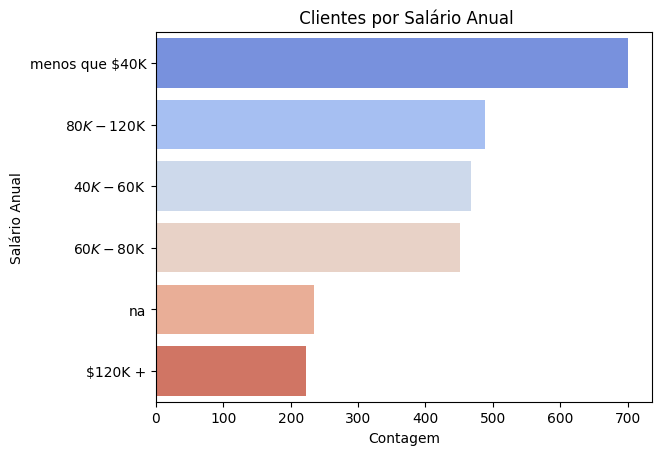

In [31]:
#Gráfico de barras na horizontal com seaborn
df_ordenado = df.sort_values('contagem_salario', ascending=False)
sns.barplot(x='contagem_salario', y='salario_anual', data=df_ordenado, orient='h', hue = 'salario_anual', palette = 'coolwarm')

# Adicionar título e rótulos aos eixos
plt.title(' Clientes por Salário Anual')
plt.xlabel('Contagem')
plt.ylabel('Salário Anual')
# Mostrar o gráfico
plt.show()

### *Observa-se que a maioria dos clientes recebem um salário menor de que $40K anual e clientes que não informaram o salário anual*

**Clientes por Tipo de Cartão**

select tipo_cartao,	COUNT(*) AS quantidade
from credito
group by tipo_cartao
order by quantidade desc;

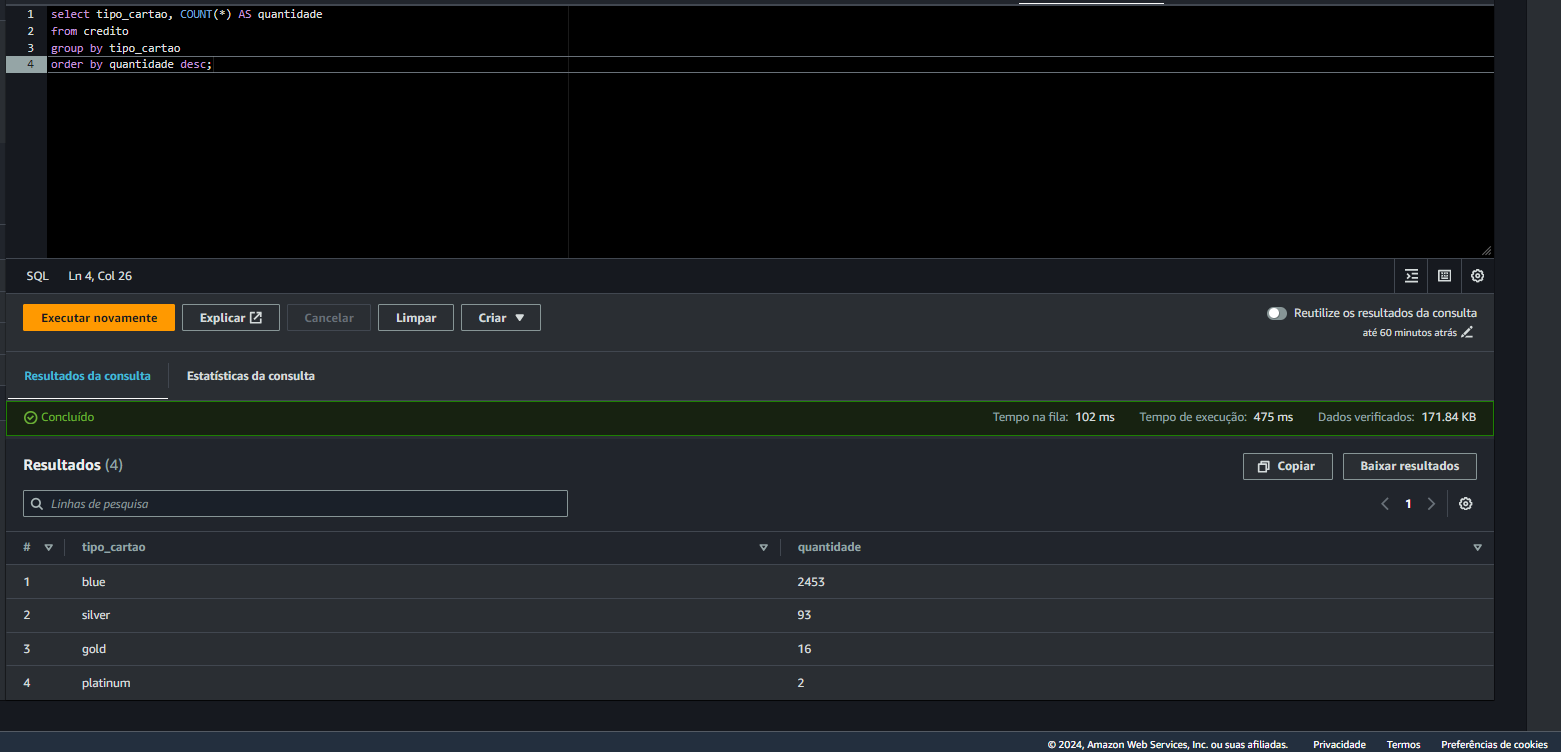

In [ ]:
# Realizar a contagem por tipo de cartão
Tipo_cartao = df['tipo_cartao']
cartao_counts = Tipo_cartao.value_counts()

# Criar uma coluna com o resultado da contagem
df['contagem_cartao'] = df['tipo_cartao'].apply(lambda x: cartao_counts[x])

df.head(10)

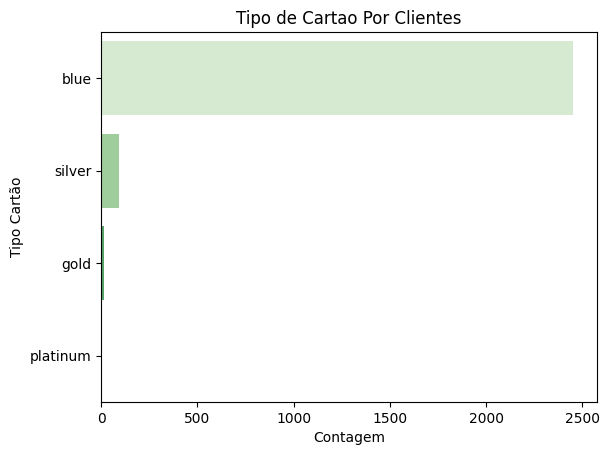

In [34]:
#Gráfico de barras com seaborn
df_ordenado = df.sort_values('contagem_cartao', ascending=False)
sns.barplot(x='contagem_cartao', y='tipo_cartao', data=df_ordenado, hue='tipo_cartao', palette='Greens')

# Adicionar título e rótulos aos eixos
plt.title('Tipo de Cartao Por Clientes')
plt.xlabel('Contagem')
plt.ylabel('Tipo Cartão')

# Mostrar o gráfico
plt.show()

### *Observa-se que a maioria dos clientes possuem o tipo de cartão blue.*

**Contagem de Cliente por Gênero**

select sexo , count(*) as quantidade, round((count(*) * 100.0) / sum(count(*)) over (), 2) as porcentagem
from credito
group by sexo;

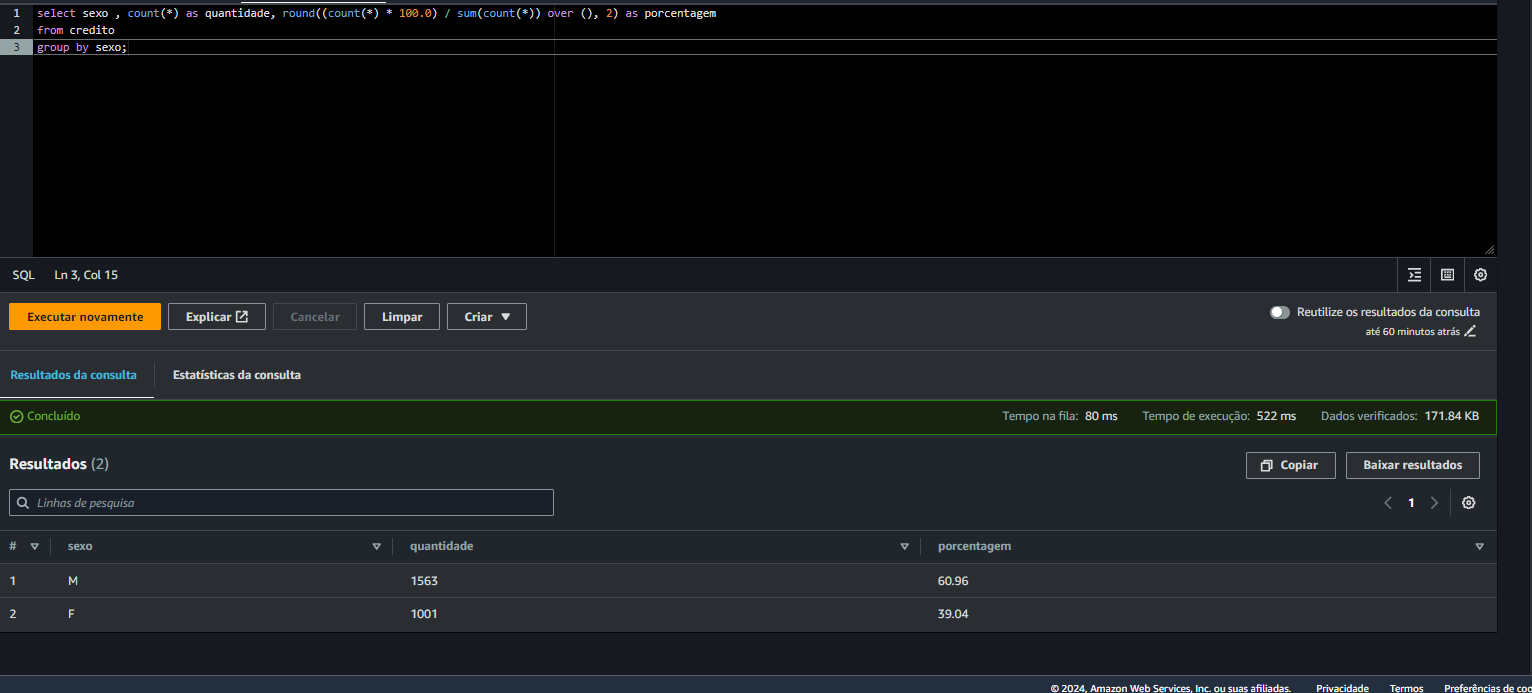


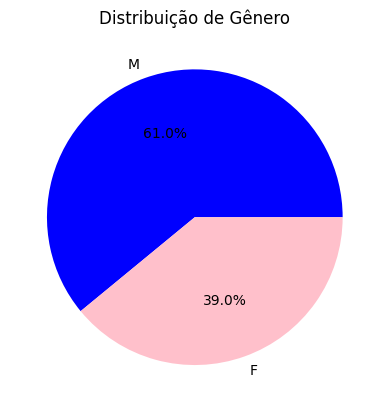

In [60]:
# Realizar a contagem por gênero feminino e masculino
labels = df['sexo'].value_counts().index.to_list()
sizes = df['sexo'].value_counts().values.tolist()
colors = ['blue', 'pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribuição de Gênero')
plt.show()


### *Observa-se que a maioria dos clientes são do gênero masculino.*

## **4. Conclusão**

Podemos concluir que esses insights auxiliam a tomada de decisões com base nas informações do clientes como salário anual, tipo de cartões e genêro para estratégias de marketing como aumentar a base clientes de mulheres fornecendo descontos ou vale compras em produtos e/ou serviços com parceiros como perfumaria, cosméticos, maquiagem e vestuários.